# Preamble

Most of this workshop is taken from Hadley's [R for Data Science](https://r4ds.had.co.nz/) book. You can find more examples, explanations and exercises there if you want.

## What this workshop covers and does not cover

In this workshop you'll learn principles behind exploratory data analysis and visualization, including tidying and transforming data to answer questions you might want to ask. You will also learn ... What you will *not* learn is how to make specific plots such

# Package prerequisites

Packages that required in this workshop are **tidyverse**, which includes the packages **ggplot2**, **dplyr**, **purrr**, and others, **modelr** which provides some helpful functions for visualizing models, **gridExtra** which helps with graph situating, and **ggrepel** which helps with plot labels.

In [3]:
library(tidyverse)
library(modelr)
library(gridExtra)
library(ggrepel)

If you get an error message “there is no package called ‘tidyverse’” then you need to install tidyverse first. (This is something you should have done before coming to the workshop, but it's ok if you didn't and it won't take long.)

In [4]:
#install.packages('tidyverse')
#install.packages('modelr')
#install.packages('gridExtra')
#install.packages('ggrepel')

# Visualizing Data

Core feature of exploratory data analysis is asking questions about data and searching for answers by visualizing and modeling data.

 * **Variable:** quantity, quality, property that can be measured.
 * **Value:** State of variable when measured.
 * **Observation:** Set of measurements made under similar conditions
 * **Tabular data:** Set of values, each associated with a variable and an observation.
 
Most questions around what type of variation or covariation occurs between variables.

Basic syntax of ggplot:
```{r}
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

## Tidy `<DATA>`

Consider the following table:

In [5]:
table1 <- data.frame(treatmenta=c(NA,16,3),treatmentb=c(2,11,1))
rownames(table1) <- c("John Smith", "Jane Doe", "Mary Johnson")
table1

,treatmenta,treatmentb
John Smith,NA,2
Jane Doe,16,11
Mary Johnson,3,1


In [6]:
table2 <- data.frame(patient=c("John Smith","John Smith","Jane Doe","John Doe","Mary Johnson","Mary Johnson"),
                     treatment=c("a","b","a","b","a","b"),
                    result=c(NA,2,16,11,3,1))
table2

patient,treatment,result
John Smith,a,NA
John Smith,b,2
Jane Doe,a,16
John Doe,b,11
Mary Johnson,a,3
Mary Johnson,b,1


Tidy data:
 * Each variable is its own column
 * Each observation is its own row
 * Each value is in a single cell

In [7]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


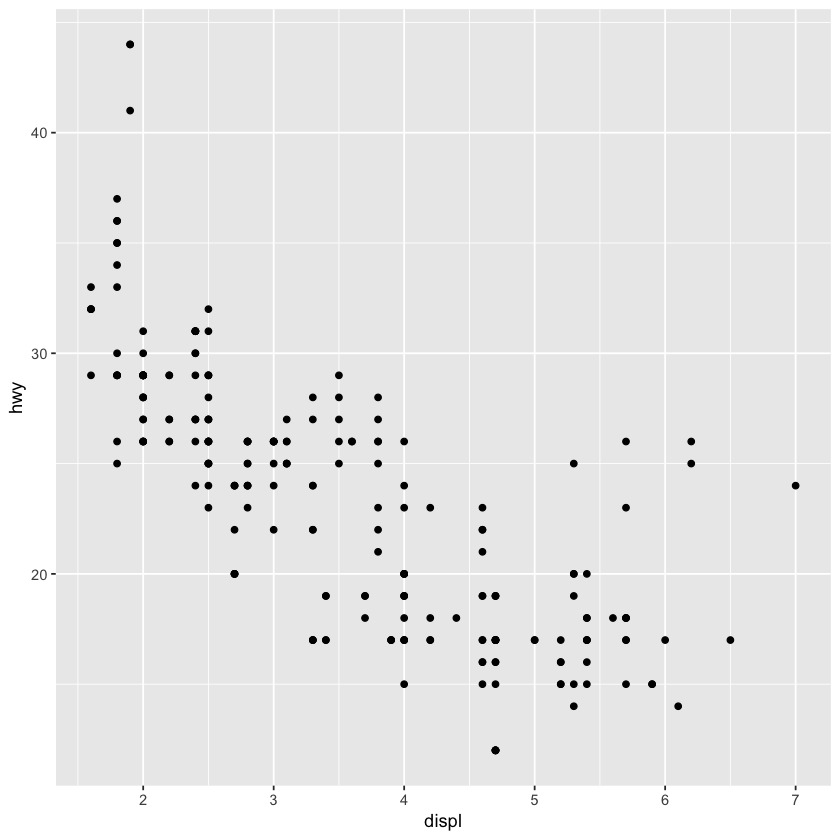

In [8]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy))

## `<MAPPINGS>`

Visual property of objects in plot, i.e. size, shape, color. Can display points in different ways by changing value of aesthetic properties. These are known as **levels**.

In [9]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”

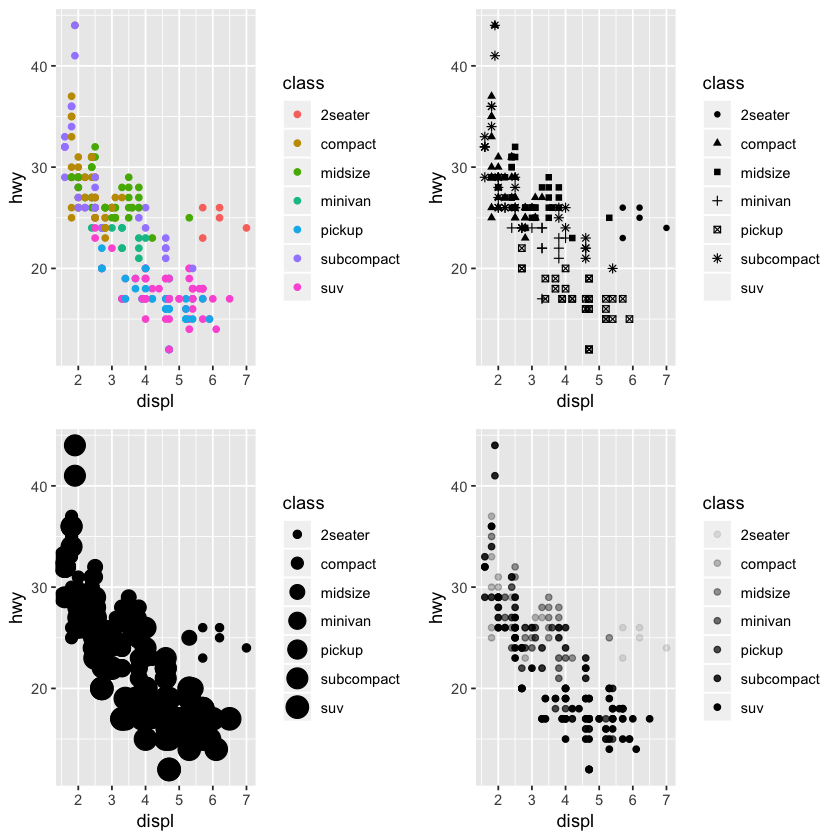

In [10]:
p1 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color=class))
p2 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=class))
p3 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,size=class))
p4 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,alpha=class))
grid.arrange(p1,p2,p3,p4,nrow=2)

Note: **ggplot2** automatically assigns levels and a scale to values. That's why in the size mapping there's no shape for suv, and why the following two pieces of code do different things.

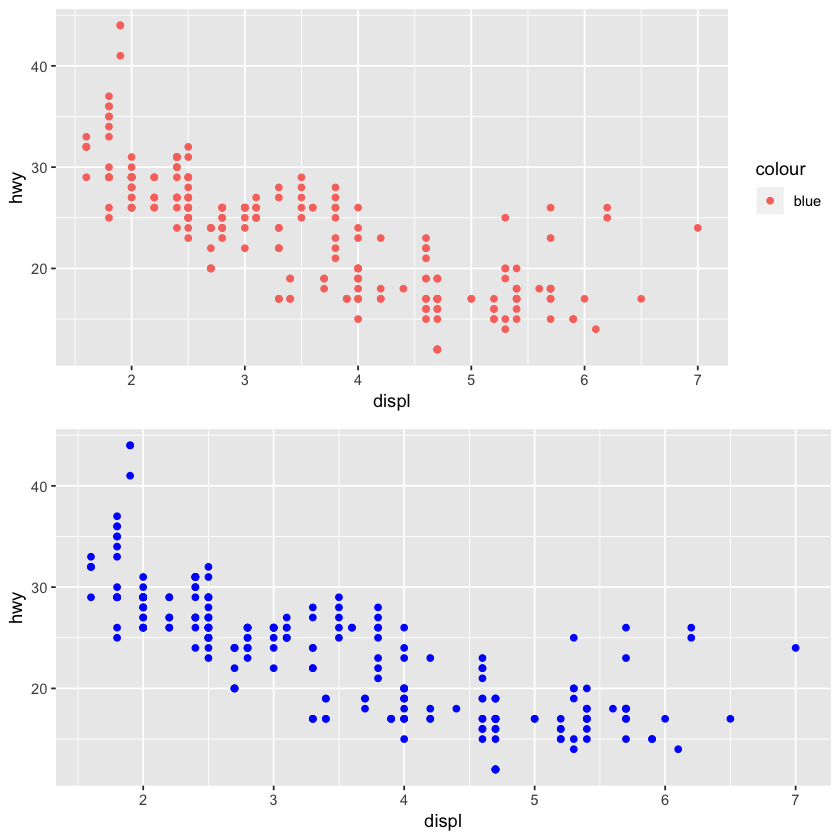

In [11]:
p1 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color='blue'))
p2 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy),color='blue')
grid.arrange(p1,p2)

## `<GEOM_FUNCTION>`

**geom** geometrical object plot uses to represent data. Bar charts use bar geomes, line charts use line geoms, boxplots, etc. Scatterplots use point geoms.

Every geom function in ggplot2 takes a `mapping` argument with specific aesthetic mappings that are possible.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


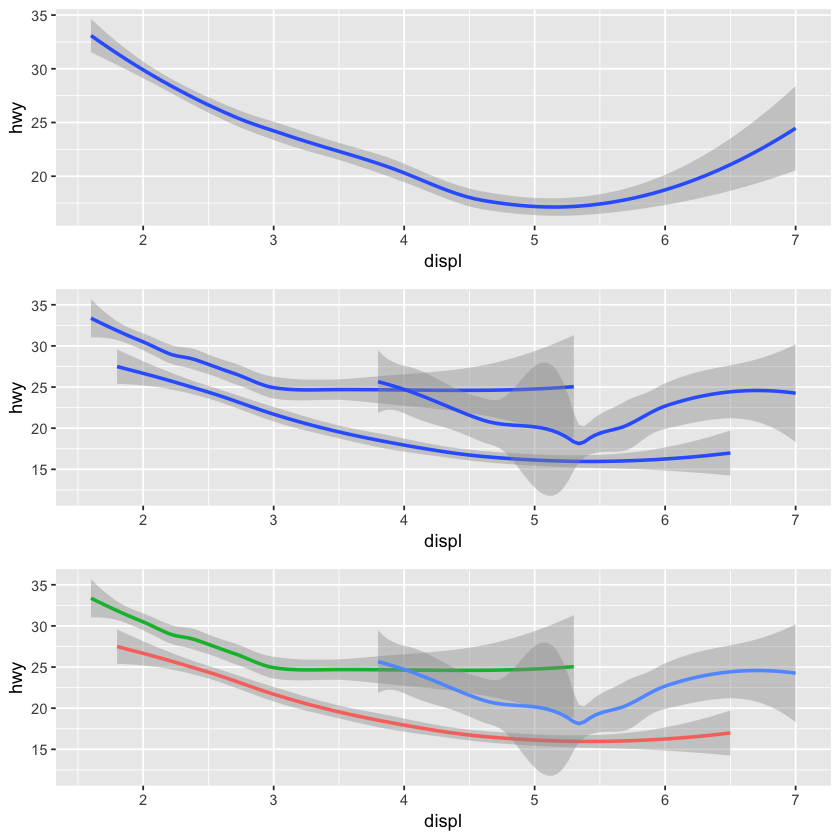

In [12]:
p1 <- ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))
              
p2 <- ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))
    
p3 <- ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv),
    show.legend = FALSE
  )

grid.arrange(p1,p2,p3)

Can display multiple geoms on same plot just by adding them

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


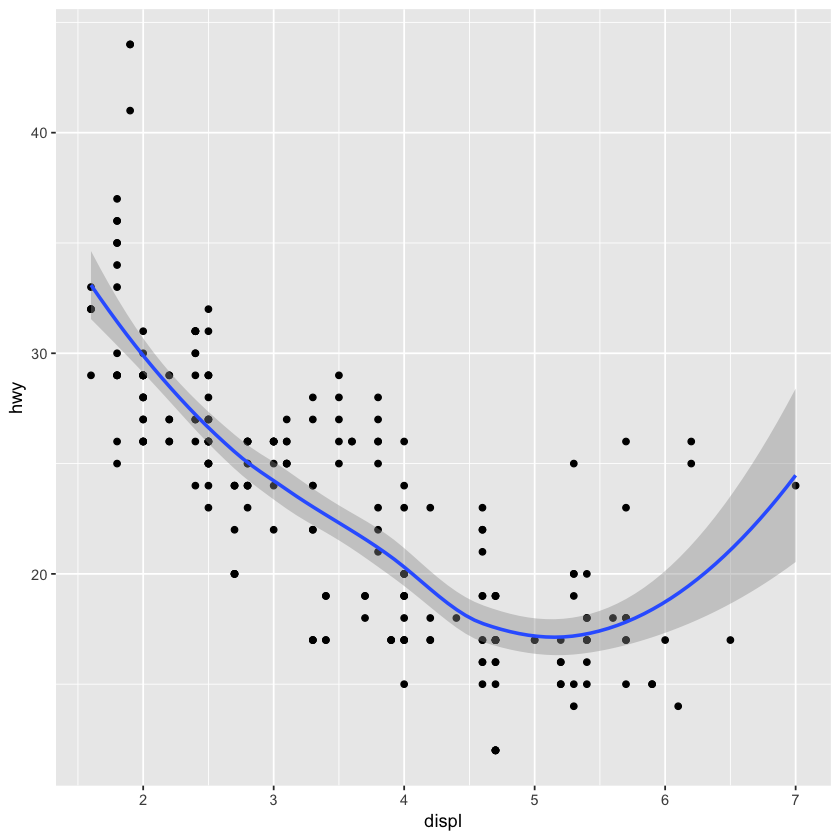

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

`ggplot()` function contains *global* mapping, while each geom has a local mapping

 * `loess` from **stats** for polynomial regression
 * `lm` from **stats** for linear models (you can also fit other models)

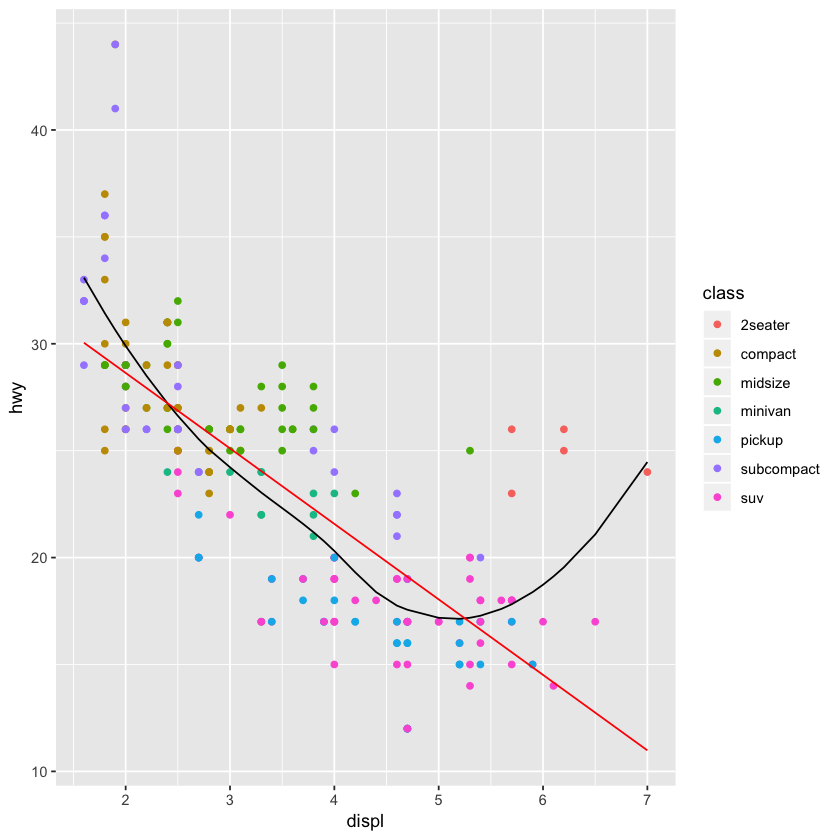

In [14]:
p<-loess(hwy~displ,data=mpg)
grid <- data_grid(data=mpg,displ)
pred1 <- add_predictions(data=grid,p)

p2 <- lm(hwy~displ,data=mpg)
pred2 <- add_predictions(data=grid,p2)

ggplot(data=mpg, mapping=aes(x=displ)) + geom_point(mapping=aes(y=hwy,color=class)) +
    geom_line(aes(y=pred),data=pred1) +
    geom_line(aes(y=pred),data=pred2,color='red')

## More syntax

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

### Facets

Subplots displaying one subset of data.

 * `facet_wrap()` for a single variable.
 * `facet_grid()` for along 2 variables.

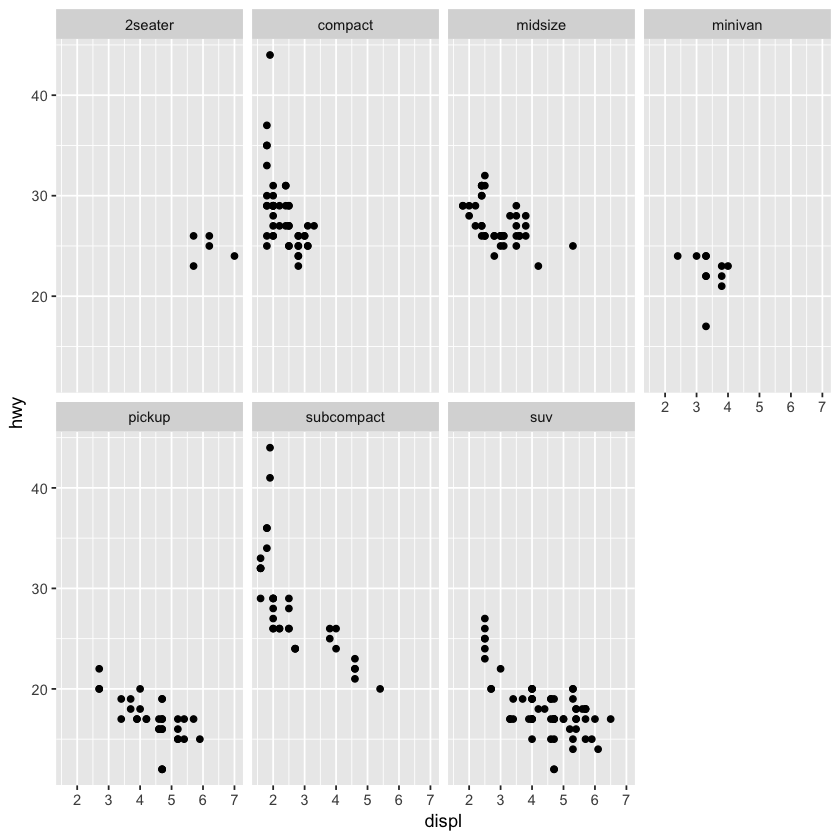

In [15]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, nrow=2)

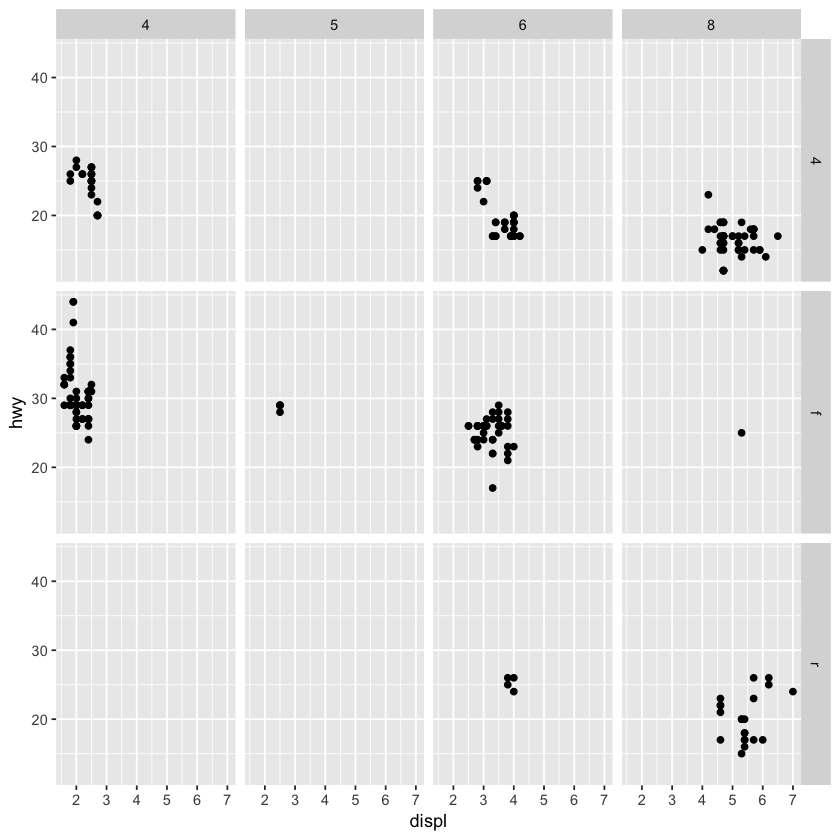

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

### Stats

Algorithm used to calculate new values for a graph. Each geom object has a default stat, and each stat has a default geom.

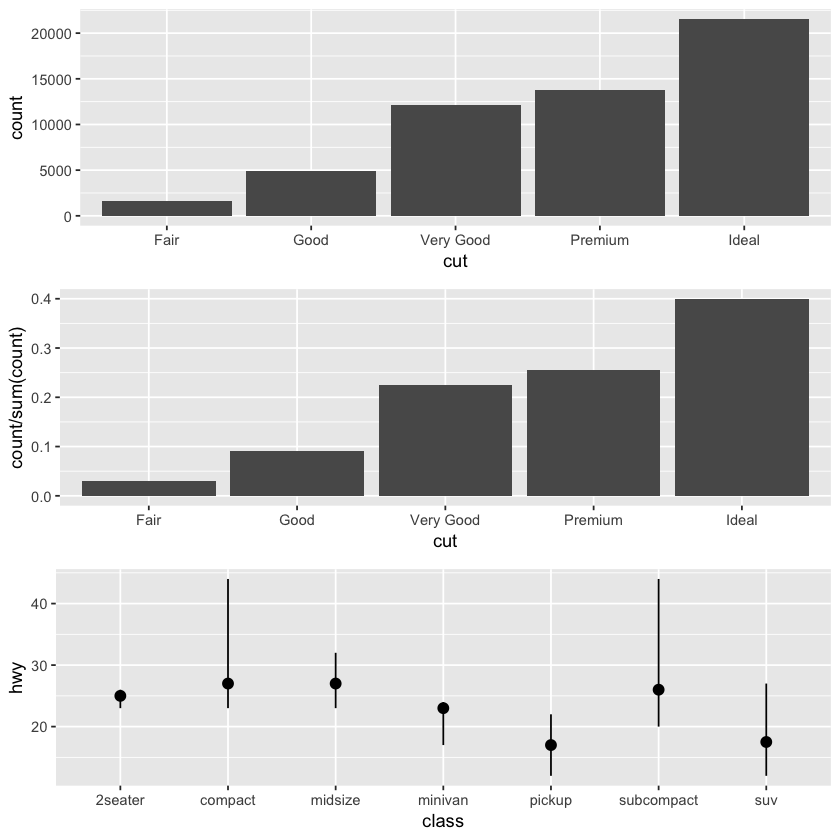

In [17]:
p1 <- ggplot(data=diamonds) +
    geom_bar(mapping=aes(x=cut))

p2 <- ggplot(data=diamonds) + geom_bar(mapping=aes(x=cut,y=..count../sum(..count..)))

p3 <- ggplot(data = mpg) + 
  stat_summary(
    mapping = aes(x = class, y = hwy),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

grid.arrange(p1,p2,p3)

### Position adjustments

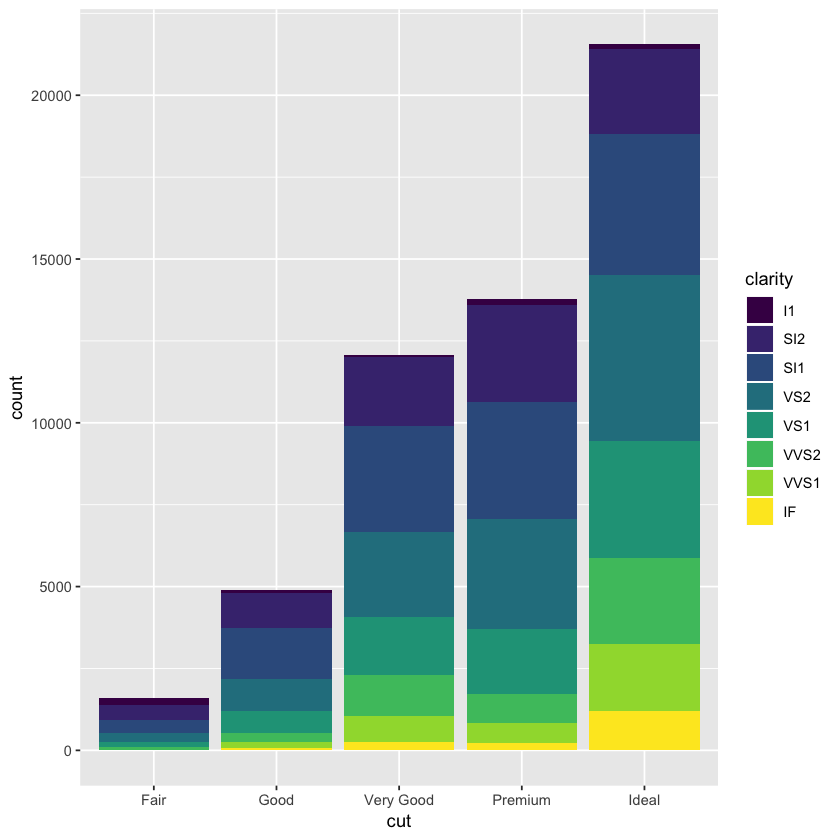

In [18]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

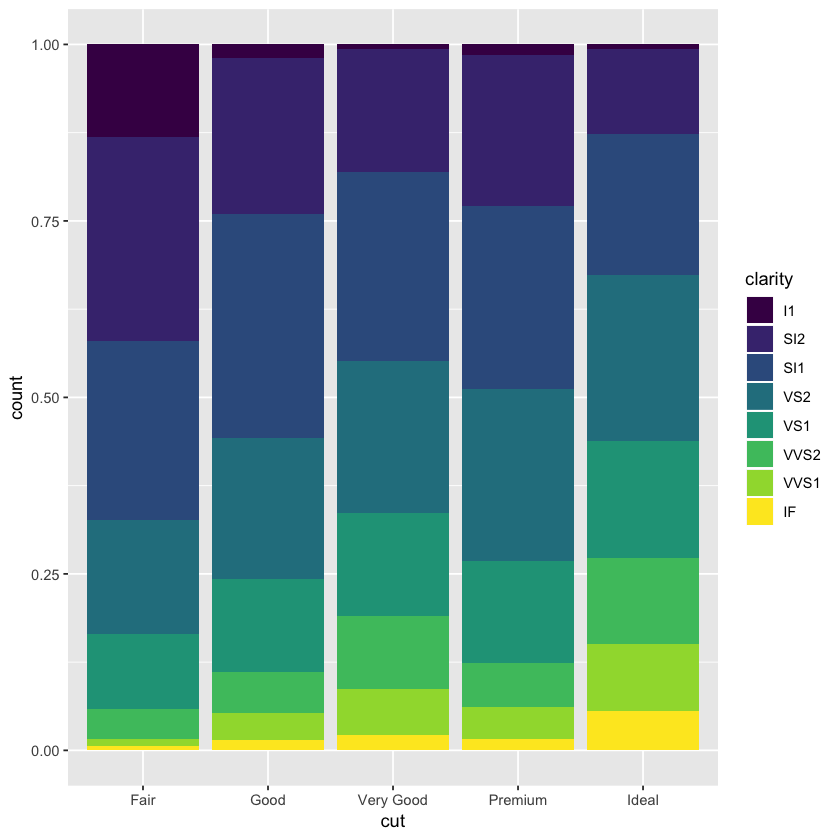

In [19]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity),position="fill")

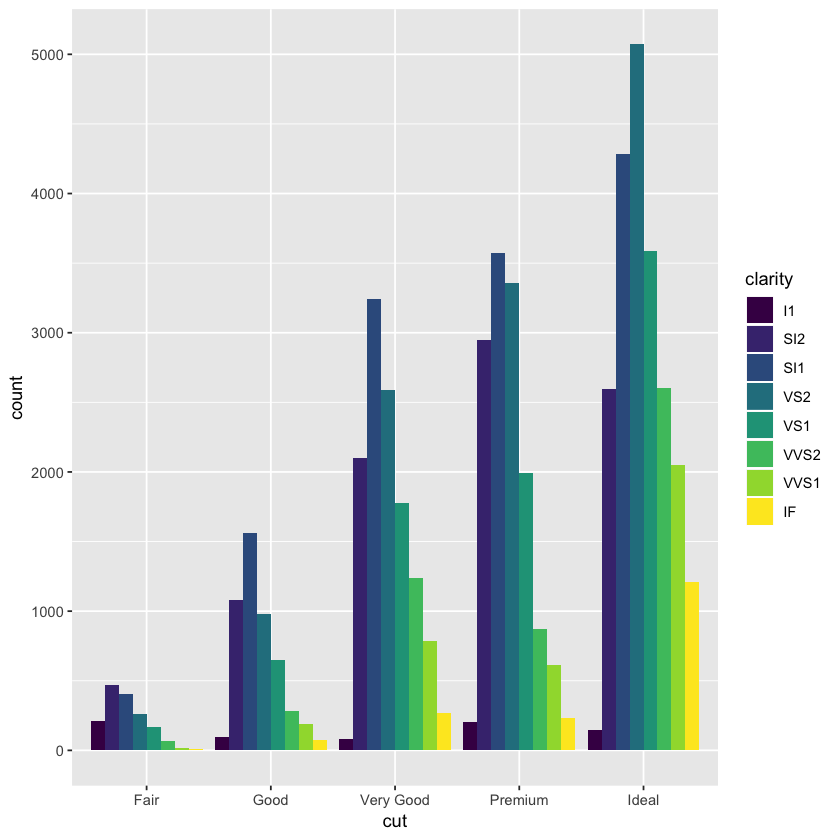

In [20]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity),position="dodge")

### Coordinate systems

 * `coord_flip()` switches x and y axes.
 * `coord_quickmap()` sets aspect ratio for maps.
 * `coord_polar()` sets polar coordinates.

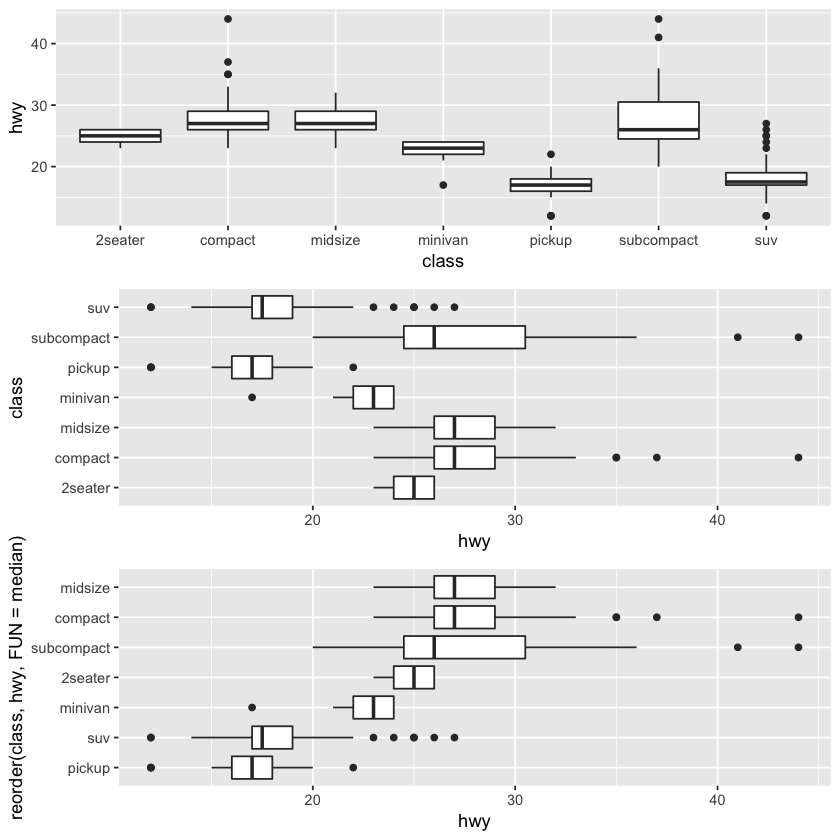

In [21]:
p1 <- ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
p2 <- ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()
p3 <- ggplot(data = mpg, mapping = aes(x = reorder(class,hwy,FUN=median), y = hwy)) + 
  geom_boxplot() +
  coord_flip()

grid.arrange(p1,p2,p3)


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



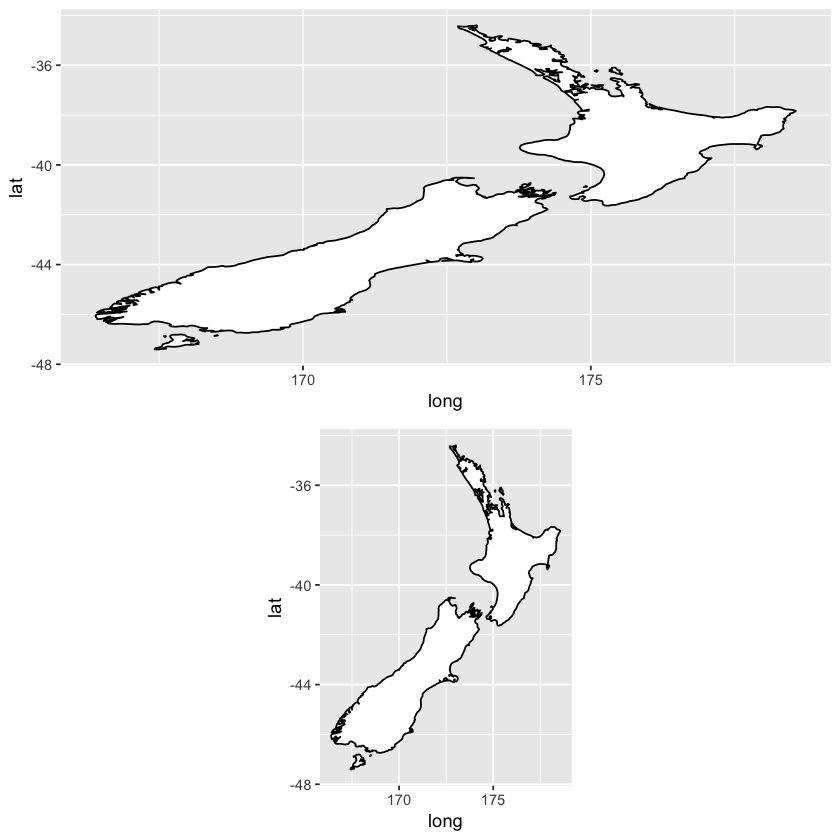

In [22]:
nz <- map_data("nz")

p1 <- ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black")

p2 <- ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black") +
  coord_quickmap()

grid.arrange(p1,p2)

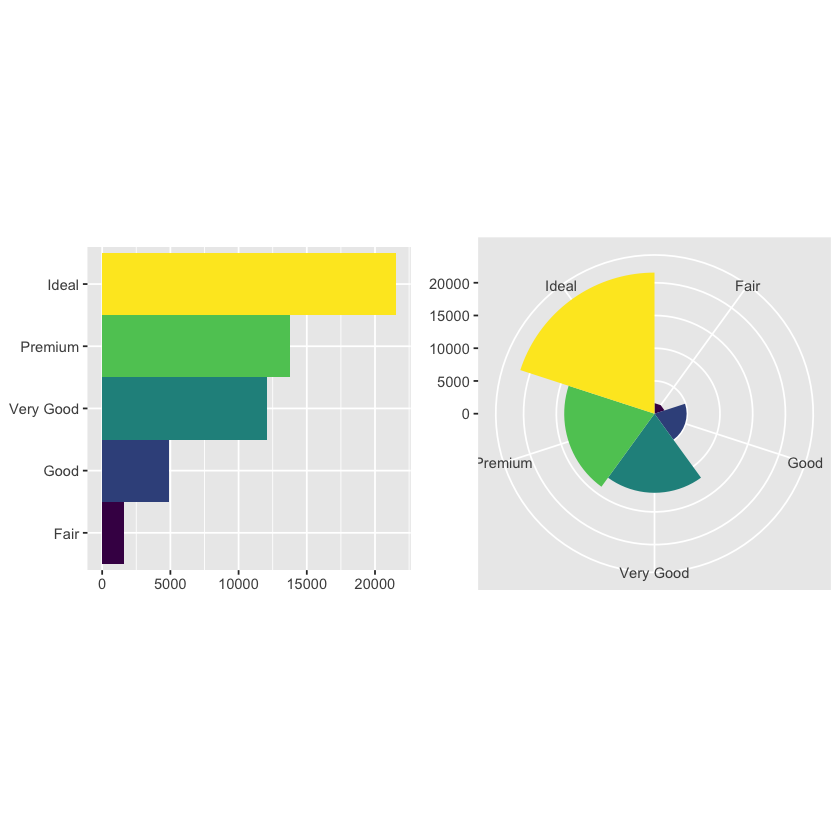

In [23]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

p1 <- bar + coord_flip()
p2 <- bar + coord_polar()
grid.arrange(p1,p2, nrow=1)

# Transforming (Tidy) Data

 * `filter()` to pick observations (rows) by their values
 * `arrange()` to reorder rows, default is by ascending value
 * `select()` to pick variables (columns) by their names
 * `mutate()` to create new variables with functions of existing variables
 * `summarise()` to collapes many values down to a single summary
 * `group_by()` to set up functions to operate on groups rather than the whole data set
 * `%>%` propagates the output from a function as input to another. eg: x %>% f(y) becomes f(x,y), and x %>% f(y) %>% g(z) becomes g(f(x,y),z).
 
All functions have similar structure:
 1. First argument is data frame
 2. Next arguments describe what to do with data frame using variable names
 3. Result is new data frame

In [24]:
no_2seaters <- filter(mpg, class != "2seater")
head(no_2seaters)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [25]:
head(arrange(mpg, class))

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [26]:
head(arrange(no_2seaters, class))

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


What kinds of cars have the best highway and city gas mileage?

In [27]:
head(arrange(mpg, desc(hwy), desc(cty), model))

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact


In [28]:
ar <- arrange(mpg, desc(hwy), desc(cty), model)
head(select(ar, cyl, drv))

cyl,drv
4,f
4,f
4,f
4,f
4,f
4,f


In [29]:
head(mutate(mpg, avg_mileage = (cty+hwy)/2))

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0


In [30]:
head(transmute(mpg,avg_mileage=(cty+hwy)/2))

avg_mileage
23.5
25.0
25.5
25.5
21.0
22.0


In [31]:
m <- mutate(mpg, avg_mileage=(cty+hwy)/2)
group_by(m,cyl) %>% summarise(avg=mean(avg_mileage))

cyl,avg
4,24.90741
5,24.62500
6,19.51899
8,15.10000


In [32]:
group_by(m, drv) %>% summarise(avg=mean(avg_mileage))

drv,avg
4,16.75243
f,24.06604
r,17.54000


In [33]:
group_by(m, drv, cyl) %>% summarise(avg=mean(avg_mileage)) %>% arrange(desc(avg))

drv,cyl,avg
f,4,26.26724
f,5,24.62500
4,4,21.47826
r,6,21.25000
f,6,21.12791
f,8,20.50000
4,6,17.14062
r,8,16.83333
4,8,14.22917


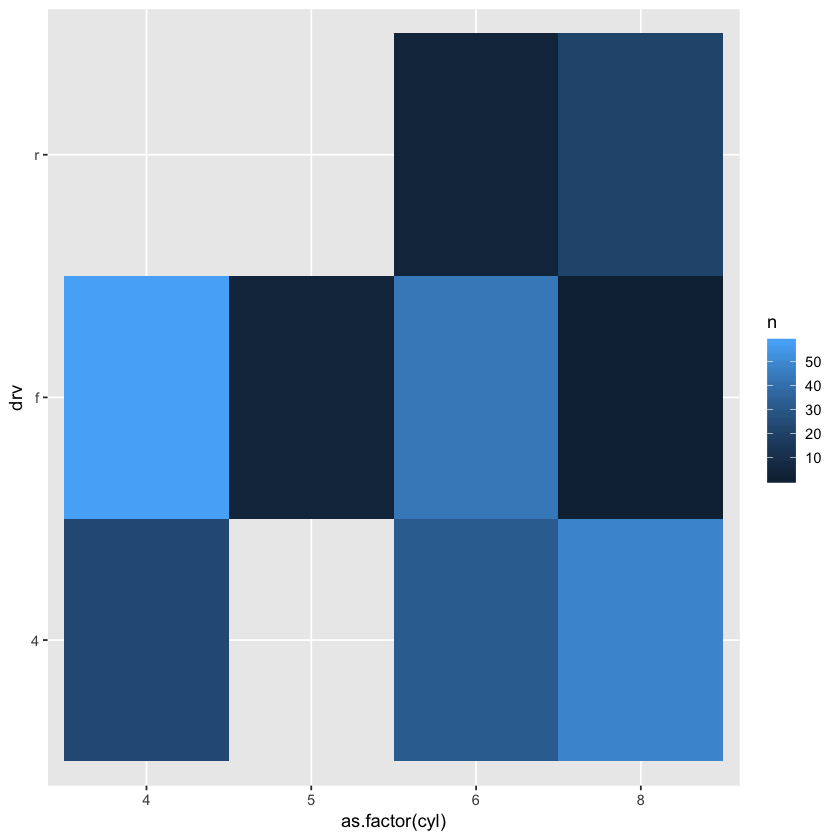

In [34]:
m %>% count(drv, cyl) %>% ggplot(mapping=aes(y=drv,x=as.factor(cyl))) + geom_tile(mapping=aes(fill=n))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


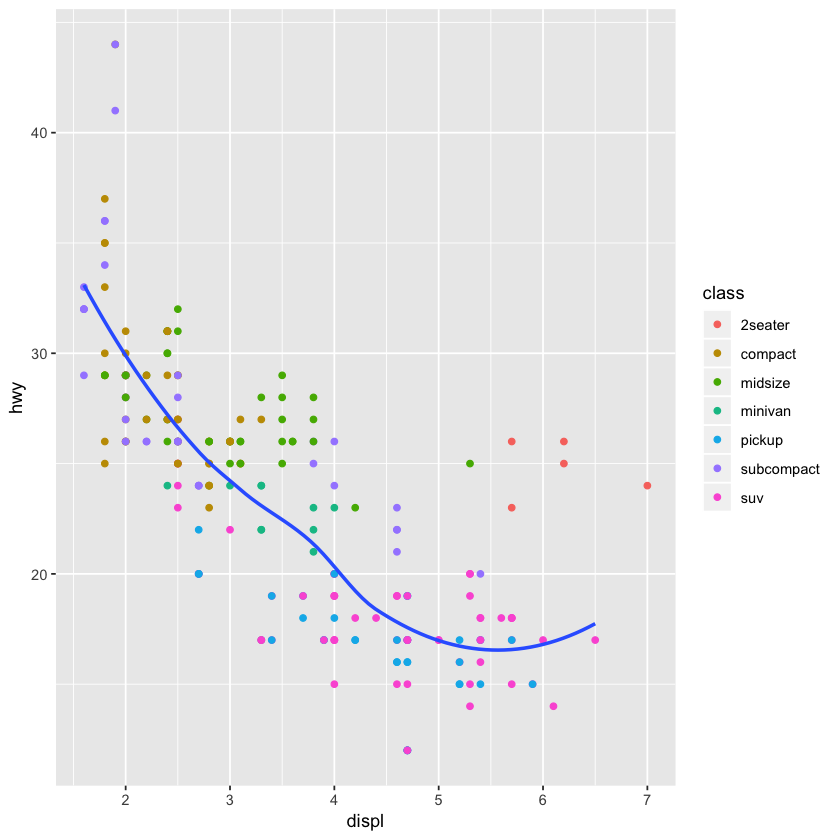

In [35]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = no_2seaters, se = FALSE)

# Importing Data

## readr

The package **readr** provides options for importing data that has already been set up as tables, such as csvs:
 * `read_csv()` is for comma-delimited files
 * `read_csv2()` is for semicolon-delimited files
 * `read_tsv()` is for tab-delimited files
 * `read_delim()` is for any other delimiters
 * `read_fwf()` is for fixed width files
 * `read_table()` is for fixed width files with columns separated by white space

If you are used to using `read.csv`, `read.table` or other functions from **utils**, these are almost exactly the same except that they import data as tibbles (special kind of data frame designed for dplyr that contains column type info, dimensions and prints out only beginning of df instead of all) instead of data frames. They are also about 10x faster, provide progress bars when loading larger files, and provide typing for columns.

If your file is massive and you *really* need something as fast as possible, look into the **data.table** package (or consider writing your core functions in C++ and using the **Rcpp** package). Data tables don't fit exactly into the tidyverse but it is not too much more of a learning curve.

In [36]:
mtcars <- read_csv(readr_example("mtcars.csv"))

Parsed with column specification:
cols(
  mpg = col_double(),
  cyl = col_double(),
  disp = col_double(),
  hp = col_double(),
  drat = col_double(),
  wt = col_double(),
  qsec = col_double(),
  vs = col_double(),
  am = col_double(),
  gear = col_double(),
  carb = col_double()
)


These functions have other optional arguments that can be helpful as well.

 * `delim`: in `read_delim()` denotes what delimiter to use
 * `col_types`: if you know what column types you want your tibble to have, specify it here. Can be useful because often data gets parsed as `factor` or `character` when you may want it to be `character` or `numeric`.
 * `skip`: how many lines to skip. Default is 0. Useful for when the file you're reading in has comments at the beginning, such as in SAM files.

We won't go through the other arguments, but you can view them in the help for the functions.

In [37]:
?read_csv

In [38]:
challenge <- read_csv(readr_example("challenge.csv"))
problems(challenge)

Parsed with column specification:
cols(
  x = col_double(),
  y = col_logical()
)
Warning message:
“1000 parsing failures.
 row col           expected     actual                                                                                         file
1001   y 1/0/T/F/TRUE/FALSE 2015-01-16 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1002   y 1/0/T/F/TRUE/FALSE 2018-05-18 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1003   y 1/0/T/F/TRUE/FALSE 2015-09-05 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1004   y 1/0/T/F/TRUE/FALSE 2012-11-28 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1005   y 1/0/T/F/TRUE/FALSE 2020-01-13 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
.... ... .................. .......... ..............................................

row,col,expected,actual,file
1001,y,1/0/T/F/TRUE/FALSE,2015-01-16,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1002,y,1/0/T/F/TRUE/FALSE,2018-05-18,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1003,y,1/0/T/F/TRUE/FALSE,2015-09-05,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1004,y,1/0/T/F/TRUE/FALSE,2012-11-28,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1005,y,1/0/T/F/TRUE/FALSE,2020-01-13,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1006,y,1/0/T/F/TRUE/FALSE,2016-04-17,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1007,y,1/0/T/F/TRUE/FALSE,2011-05-14,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1008,y,1/0/T/F/TRUE/FALSE,2020-07-18,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1009,y,1/0/T/F/TRUE/FALSE,2011-04-30,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1010,y,1/0/T/F/TRUE/FALSE,2010-05-11,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'


# Tidying Data

Tidy data:
 * Each variable is its own column
 * Each observation is its own row
 * Each value is in a single cell

Consider the following tables:

In [39]:
table1 <- data.frame(country=c("Afghanistan","Afghanistan","Brazil","Brazil","China","China"),
                     year=rep(c(1999,2000),3),
                    cases=c(745,2666,37737,80488,212258,213766),
                    population=c(19987071,20595360,172006362,174504898,1272915272,1280428583))
table1

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [40]:
table2 <- data.frame(country=c(rep("Afghanistan",4),rep("Brazil",4),rep("China",4)),
                    year=rep(c(1999,1999,2000,2000),3),
                    type=rep(c("cases","population"),6),
                     count=c(745,19987071,2666,20595360,37737,172006362,80488,174504898,212258,1272915272,213766,1280428583))
head(table2)

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362


In [41]:
table3 <- data.frame(country=c("Afghanistan","Afghanistan","Brazil","Brazil","China","China"),
                     year=rep(c(1999,2000),3),
                    rate=(c('745/19987071','2666/20595360','37737/172006362','80488/174504898','212258/1272915272','213766/1280428583')))
head(table3)

country,year,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [42]:
table4a <- data.frame(country=c("Afghanistan","Brazil","China"),`1999`=c(745,37737,212258),'2000'=c(2666,80488,213766),check.names=FALSE)
table4b <- data.frame(country=c("Afghanistan","Brazil","China"),`1999`=c(19987071,172006362,1272915272),'2000'=c(20595360,174504898,1280428583),check.names=FALSE)
table4a
table4b

country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


country,1999,2000
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


## Gathering

`table4a` column names `1999` and `2000` represent values of `year` variable. Each row represents 2 observations, not 1. Need to gather columns into new pair of variables.

Parameters:
 * Set of columns that represent values, not variables.
 * `key`: name of variable whose values are currently column names.
 * `value`: name of variable whose values are currently spread out across multiple columns.

In [43]:
tidy4a <- table4a %>% gather(`1999`,`2000`,key="year",value="cases")
tidy4a

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [44]:
tidy4b <- table4b %>% 
  gather(`1999`, `2000`, key = "year", value = "population")
tidy4b

country,year,population
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


Merge tables using `left_join()` (many other types of table joins as well)

In [45]:
left_join(tidy4a,tidy4b)

Joining, by = c("country", "year")


country,year,cases,population
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


## Spreading

`table2` has each observation in two rows. Need to spread observations across columns with appropriate variable names instead.

Parameters:
 * `key`: Column that contains variable names.
 * `value`: Column that contains values for each variable.

In [46]:
table2 %>% spread(key=type,value=count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separating

`table3` has `rate` column that actually contains two variables (`cases` and `population`). Need to separate into two columns.

Parameters:
 * column/variable that needs to be separated.
 * `into`: columns to split into
 * `sep`: separator value. Can be regexp or positions to split at. If not provided then splits at non-alphanumeric characters.

In [47]:
table3 %>% 
  separate(rate, into = c("cases", "population"), sep="/")

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [48]:
sep <- table3 %>% 
  separate(year, into = c("century", "year"), sep = 2)
sep

country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


## Uniting

Now `sep` has `century` and `year` columns that can be combined into a single column. In other words, we want to unite them.

Parameters:
 * Name of united column/variable
 * Names of columns/variables to be united
 * `sep`: Separator value. Defualt is '_'


In [49]:
sep %>% 
  unite(new, century, year)

country,new,rate
Afghanistan,19_99,745/19987071
Afghanistan,20_00,2666/20595360
Brazil,19_99,37737/172006362
Brazil,20_00,80488/174504898
China,19_99,212258/1272915272
China,20_00,213766/1280428583


## Not all data should be tidy

Matrices, phylogenetic trees (although `ggtree` and `treeio` have tidy representations that help with annotating trees), etc.

# Publication Quality Graphs

## Labels

`labs()` to add most kinds of labels: title, subtitle, captions, x-axis, y-axis, legend, etc.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


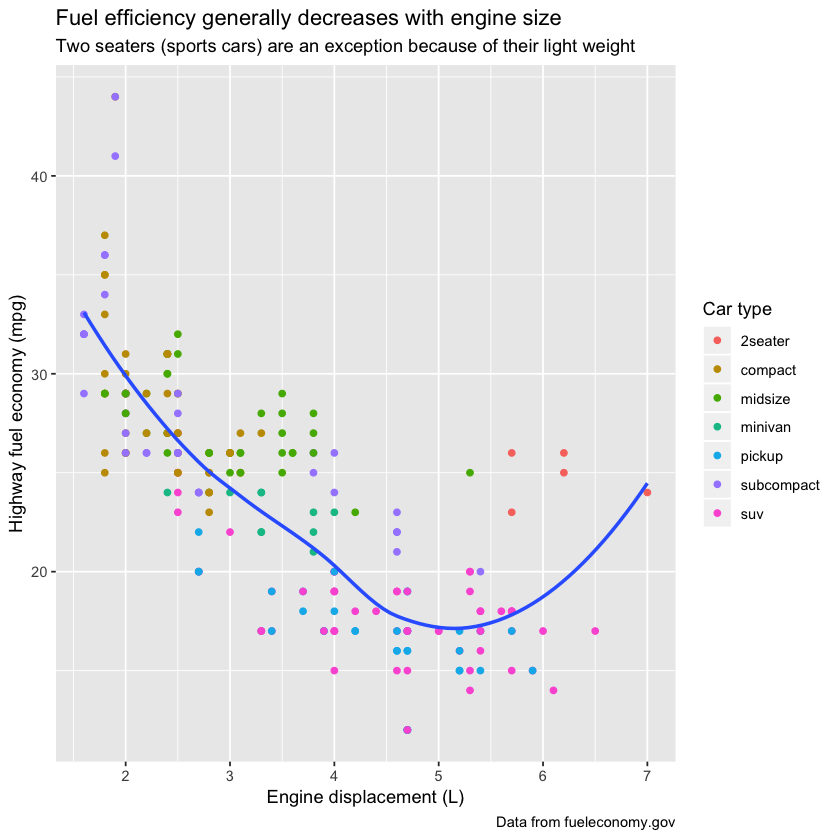

In [50]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## Annotations

Can use `geom_text()` to add text labesls on the plot.

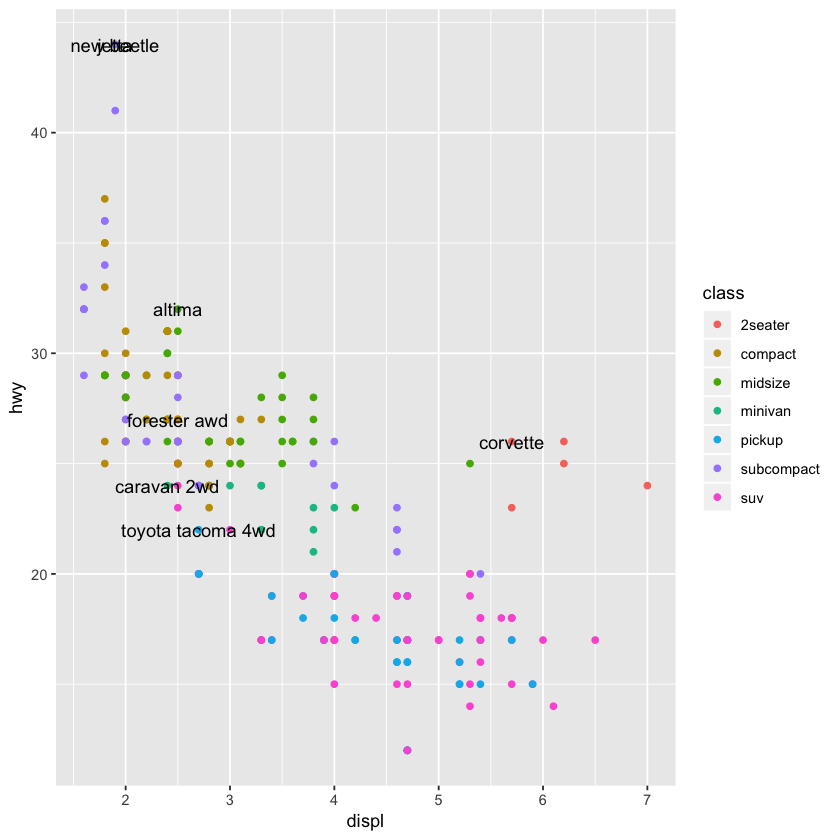

In [51]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)

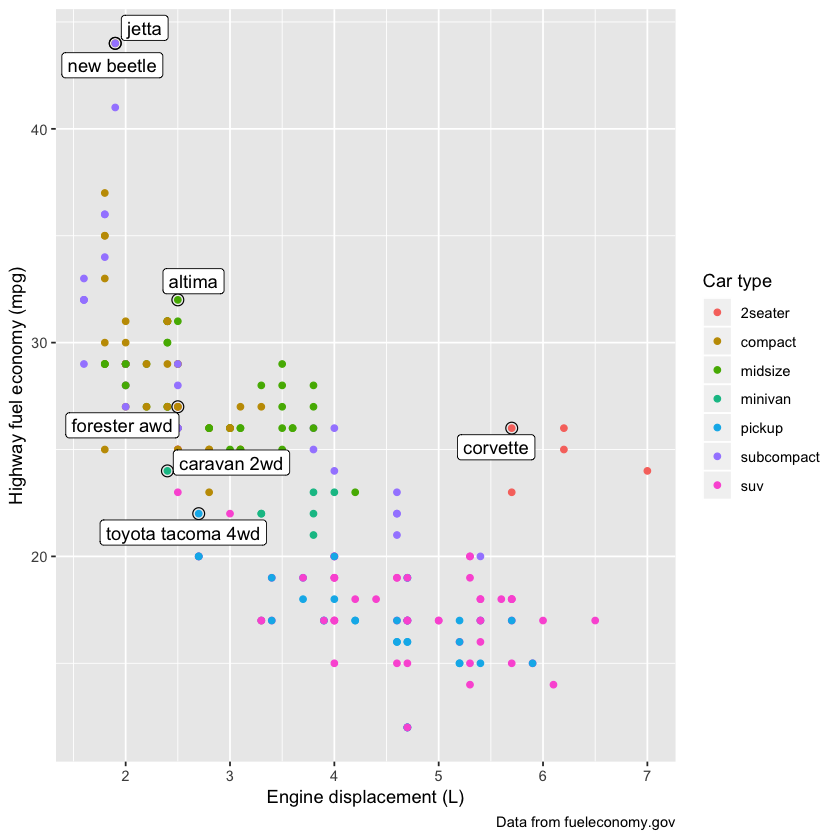

In [52]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class) +
  labs(
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## Scales

 * `breaks`: For the position of ticks
 * `labels`: For the text label associated with each tick.
 * Default scale is x continuous, y continuous but can also do x logarithmic, y logarithmic, change color scales.

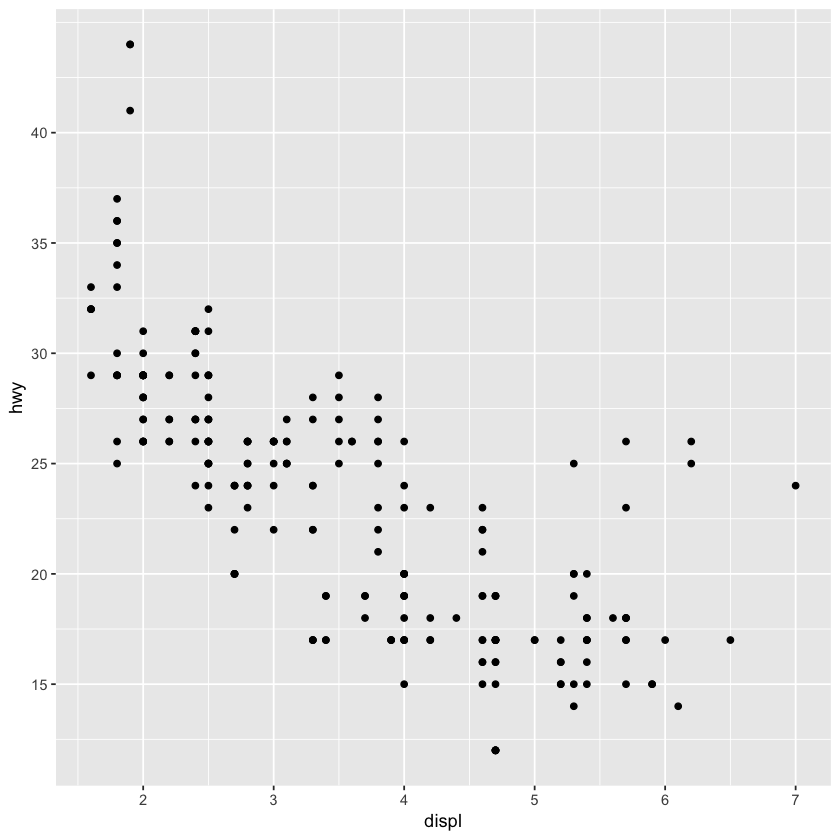

In [53]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

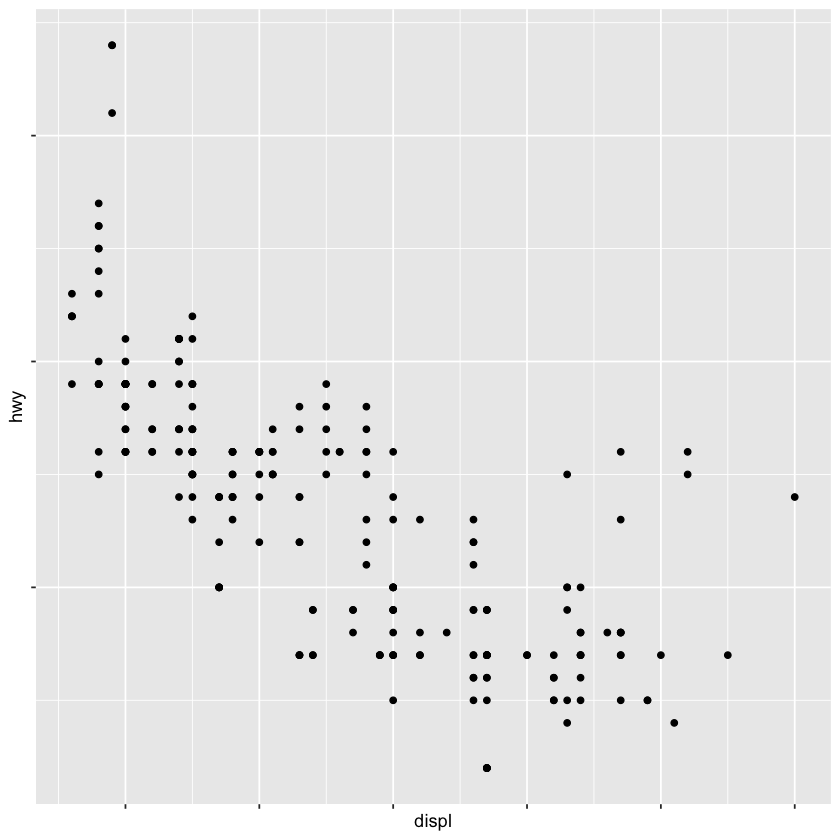

In [54]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_x_continuous(labels = NULL) +
  scale_y_continuous(labels = NULL)

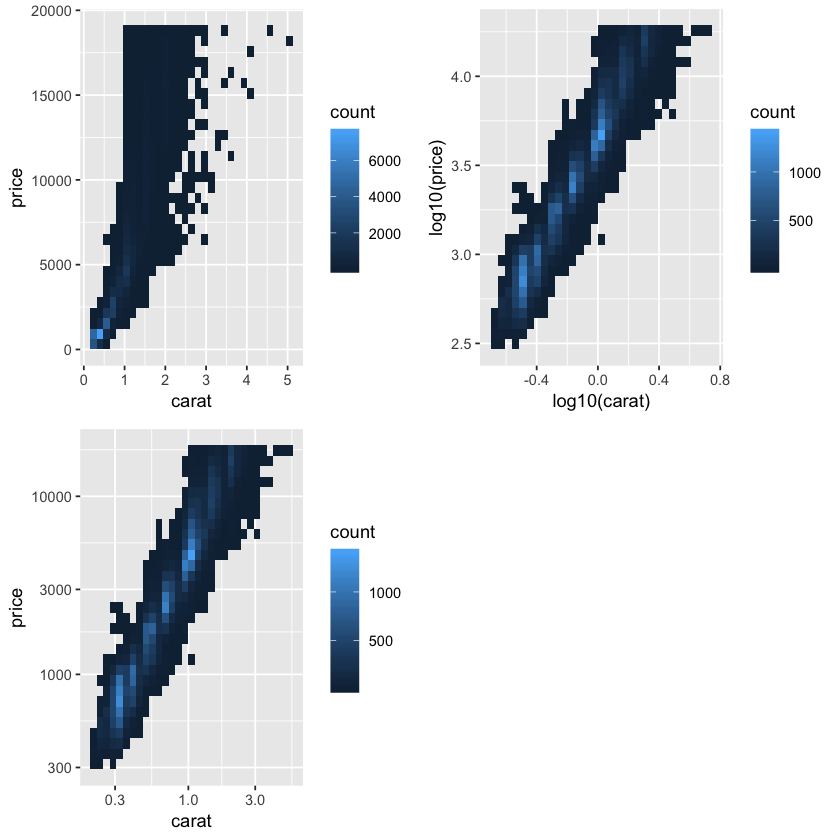

In [55]:
p1 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d()

p2 <- ggplot(diamonds, aes(log10(carat), log10(price))) +
  geom_bin2d()

p3 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

grid.arrange(p1,p2,p3,nrow=2)

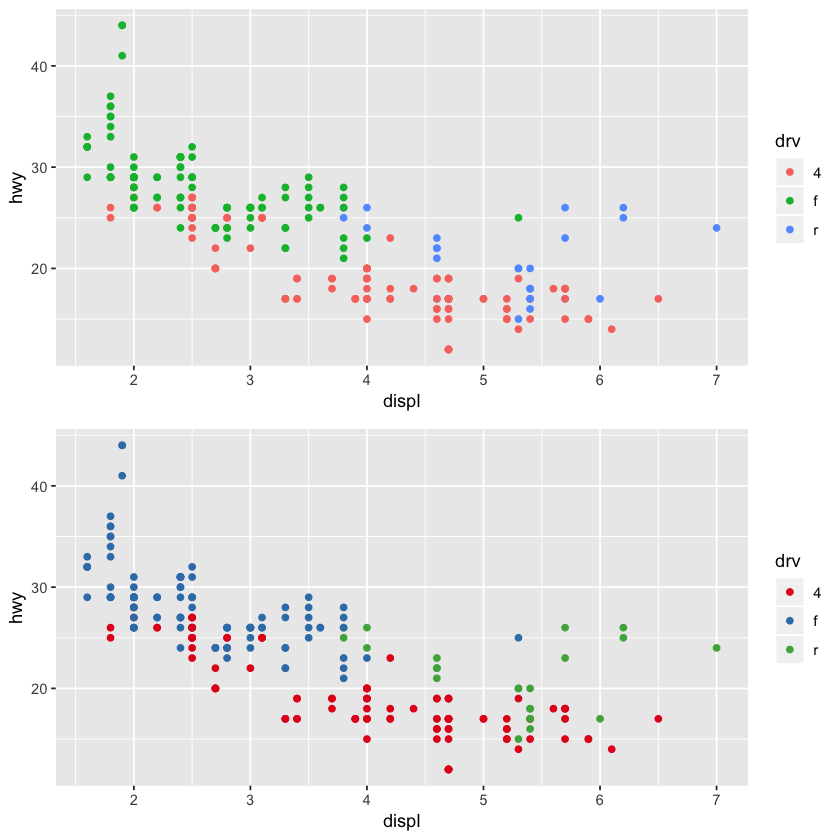

In [56]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv))

p2 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set1")

grid.arrange(p1,p2)

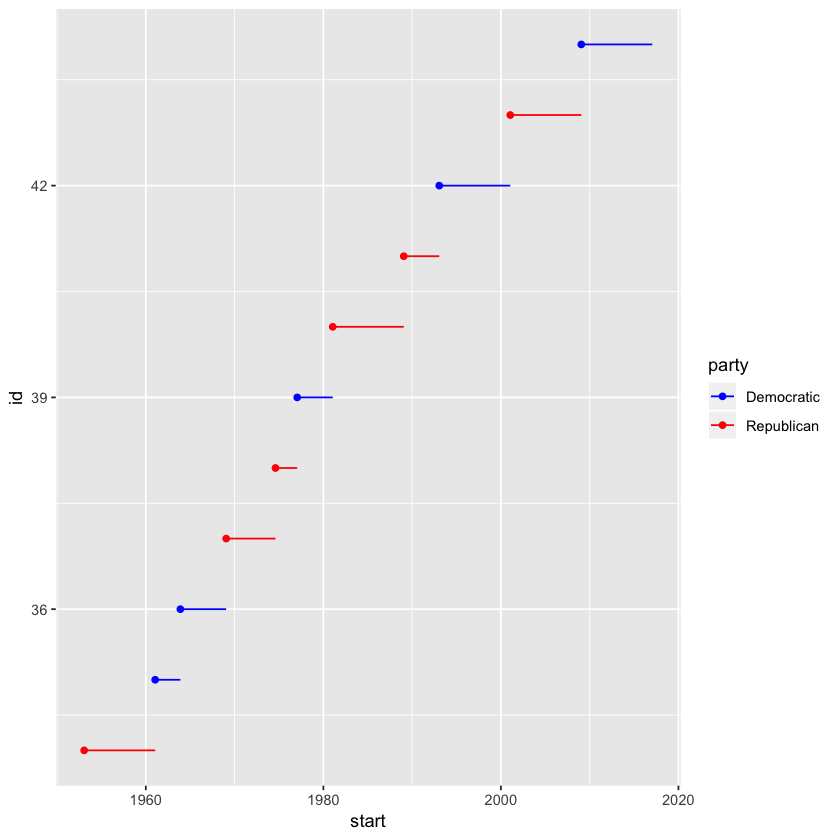

In [57]:
presidential %>%
  mutate(id = 33 + row_number()) %>%
  ggplot(aes(start, id, colour = party)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_colour_manual(values = c(Republican = "red", Democratic = "blue"))

## Legend positioning

`theme(legend.position)` to control legend position. `guides()` with `guide_legened()` or `guide_colourbar()` for legend display.

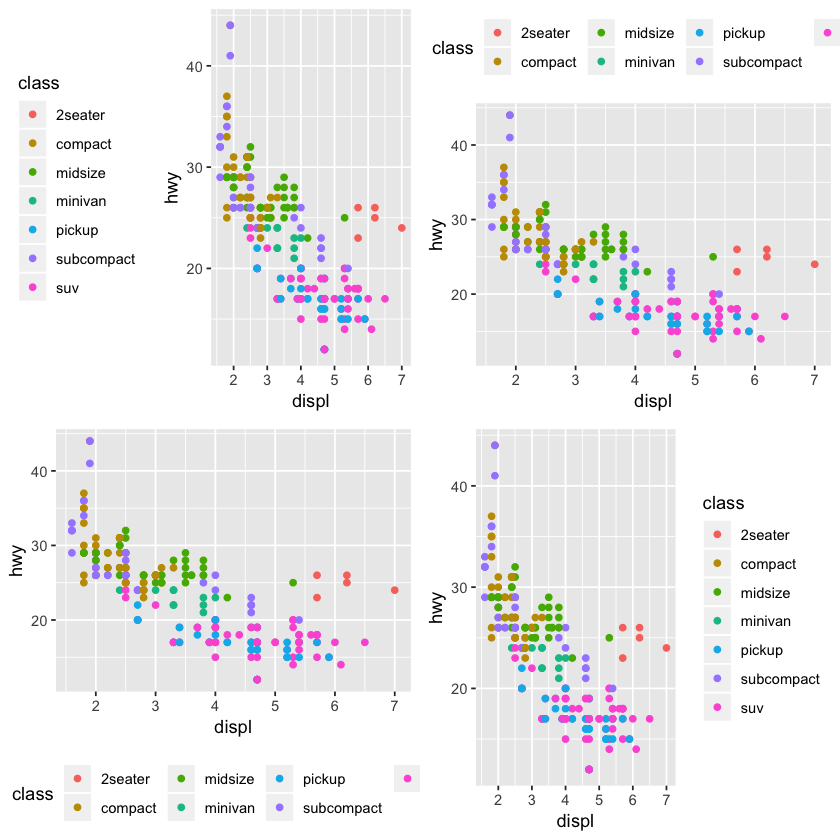

In [58]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))

p1 <- base + theme(legend.position = "left")
p2 <- base + theme(legend.position = "top")
p3 <- base + theme(legend.position = "bottom")
p4 <- base + theme(legend.position = "right")

grid.arrange(p1,p2,p3,p4, nrow=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


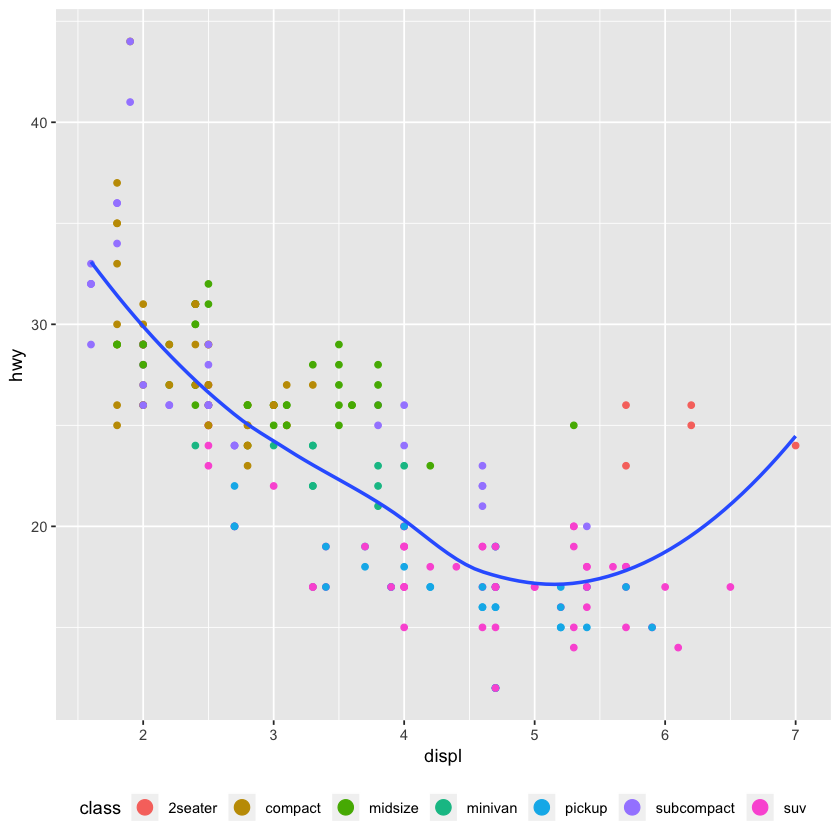

In [59]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 4)))

## Zooming

Three ways to control plot limits:
 * Adjusting what data are plotted
 * Setting limits in each scale
 * Setting `xlim` and `ylim` in `coord_cartesian()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


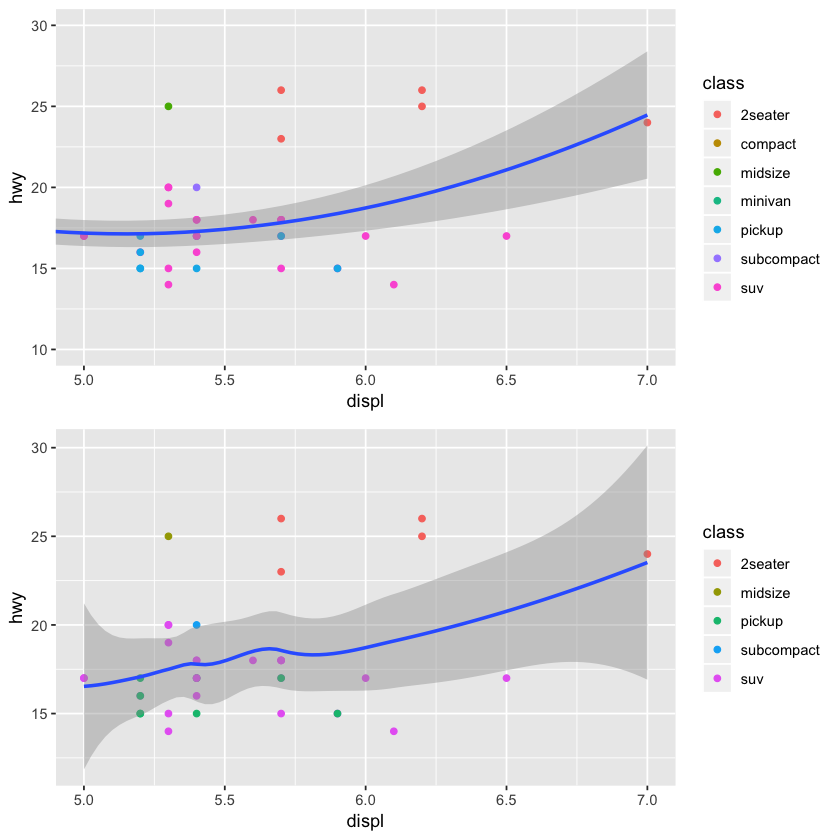

In [60]:
p1 <- ggplot(mpg, mapping = aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth() +
  coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))

p2 <- filter(mpg, displ >= 5, displ <= 7, hwy >= 10, hwy <= 30) %>%
  ggplot(aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth()

grid.arrange(p1,p2)

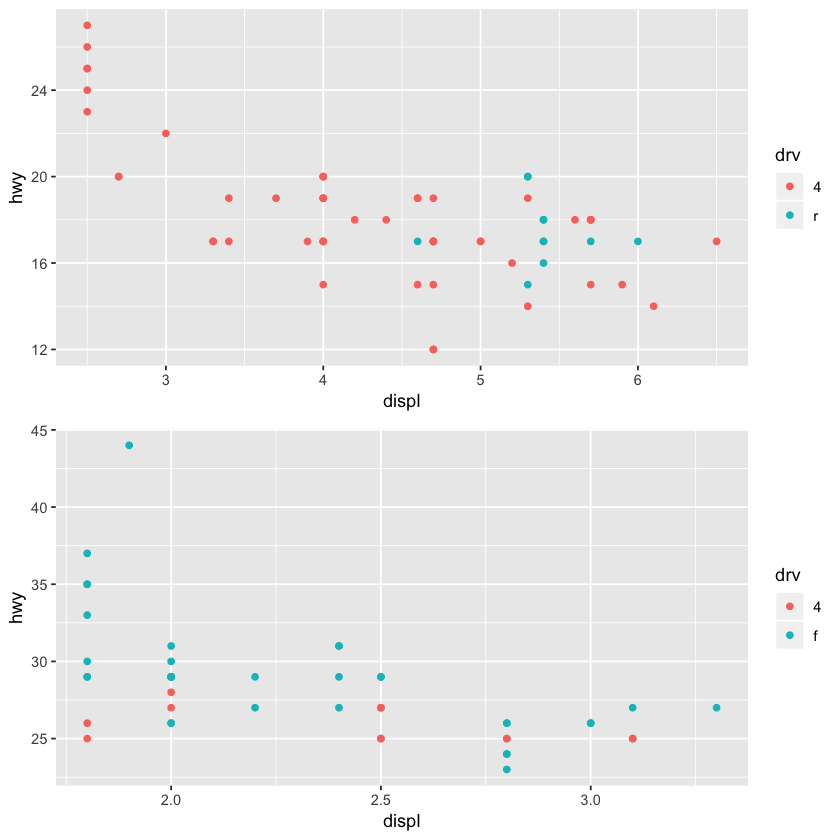

In [61]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

p1 <- ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point()

p2 <- ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point()

grid.arrange(p1,p2)

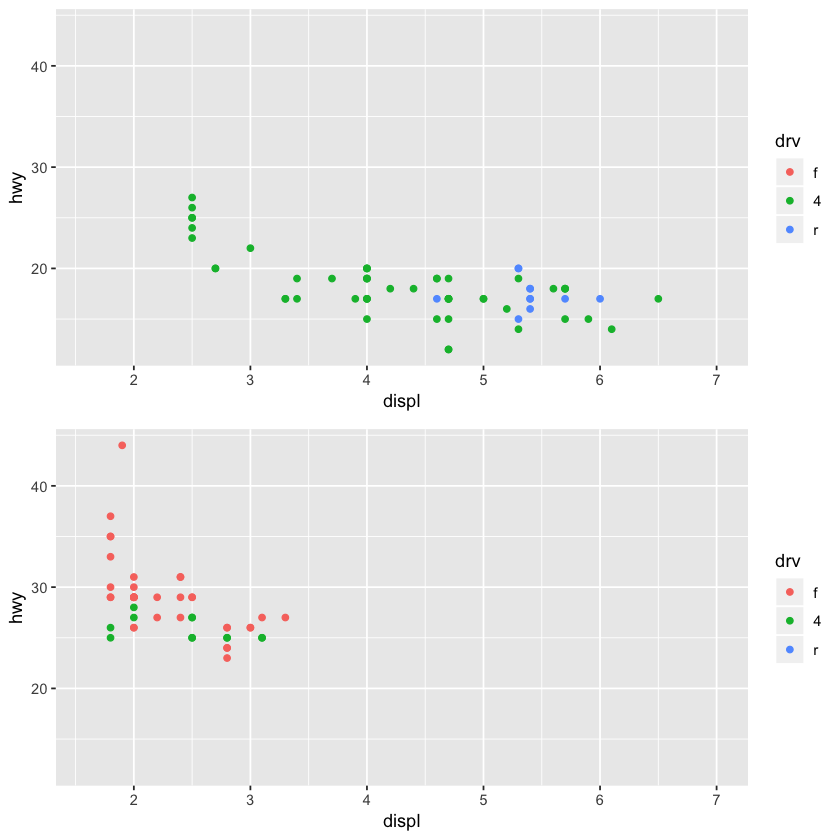

In [62]:
x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_colour_discrete(limits = unique(mpg$drv))

p1 <- ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

p2 <- ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

grid.arrange(p1,p2)

## Themes

**ggplot2** has 8 themes by default, can get more in other packages like **ggthemes**. Generally prefer `theme_classic()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


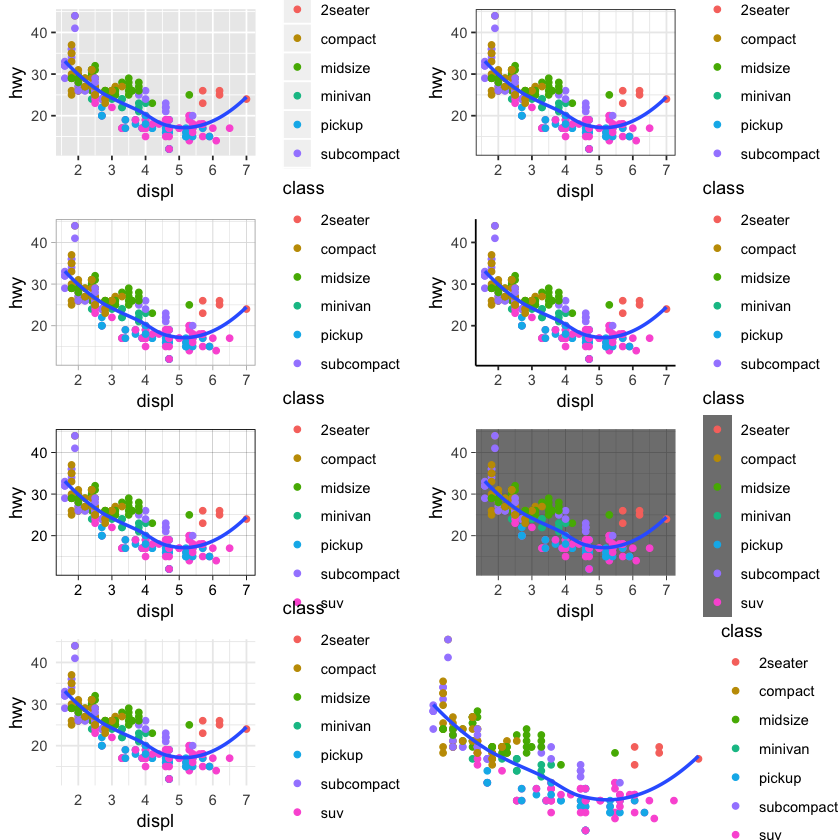

In [63]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE)

p1 <- base + theme_bw()
p2 <- base + theme_light()
p3 <- base + theme_classic()
p4 <- base + theme_linedraw()
p5 <- base + theme_dark()
p6 <- base + theme_minimal()
p7 <- base + theme_void()

grid.arrange(base,p1,p2,p3,p4,p5,p6,p7,nrow=4)

## Saving your plots

 * `ggsave()` will save most recent plot to disk
 * `tiff()` will save next plot to disk
 * Other functions like `postscript()` for eps files, etc.
 * All can take `width`, `height`, `fonts`, `pointsize`, `res` (resolution) arguments

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


pdf 
  2

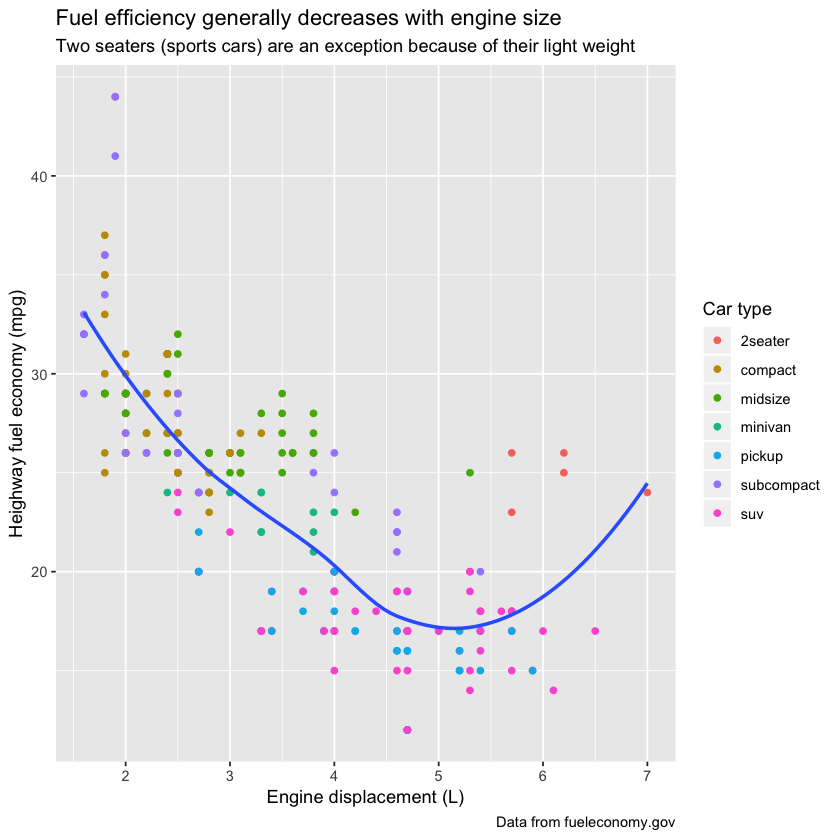

In [64]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(x="Engine displacement (L)",y="Heighway fuel economy (mpg)",
    title = "Fuel efficiency generally decreases with engine size",
    caption = "Data from fueleconomy.gov",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    colour = "Car type"
  ) + x_scale + y_scale
p1
ggsave("my_plot.pdf")

tiff("my_plot.tiff",width=7,height=5,units="in",pointsize=8,res=350)
p1
dev.off()

# Some other useful visualization packages

We don't have time in this workshop to get in depth to other workshops, but here are some more useful visualization packages that may be helpful for your research.

## ggtree for phylogenetics

Resources and associated packages:
 * [Data Integration, Manipulation and Visualization of Phylogenetic Trees](https://yulab-smu.github.io/treedata-book/index.html)
 * [treeio](https://bioconductor.org/packages/release/bioc/html/treeio.html)
 * [tidytree](https://cran.r-project.org/web/packages/tidytree/index.html)
 
## cowplot

Meant to provide publication-ready theme for **gplot2** that requires minimum amount of fiddling with sizes of axis labels, plot backgrounds, etc. Auto-sets `theme_classic()` for all plots.

In [65]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14.3

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2  maps_3.3.0      ggrepel_0.8.0   gridExtra_2.3  
 [5] modelr_0.1.2    forcats_0.3.0   stringr_1.3.1   dplyr_0.7.8    
 [9] purrr_0.2.5     readr_1.3.1     tidyr_0.8.2     tibble_2.0.1   
[13] ggplot2_3.1.0   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.5   repr_0.19.2        reshape2_1.4.3    
 [5] haven_2.0.0        lattice_0.20-38    colorspace_1.4-0   generics_0.0.2    
 [9] viridisLite_0.3.0  htmltools_0.3.6    base64enc_0